In [1]:
import numpy as np ; import matplotlib.pyplot as plt ; import pandas as pd ; import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v3.csv')

In [4]:
df.duplicated().sum()

0

In [5]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,0,0
1,1,flat,emaar mgf the palm drive,sector 66,2.80,14358.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,12.0,East,New Property,1950.0,1920.0,1600.0,1,1,0,1,0,2,69
2,2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,16.0,NaN,Under Construction,1689.0,NaN,1082.0,0,0,0,1,0,1,103
3,3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,3.0,NaN,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,0,20
4,4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,1.0,South,Old Property,NaN,1800.0,NaN,1,0,0,1,0,0,24


In [6]:
df.furnishing_type.value_counts()

furnishing_type
0    2408
1    1053
2     209
Name: count, dtype: int64

In [7]:
df.shape

(3670, 24)

In [8]:
df.columns

Index(['Unnamed: 0', 'property_type', 'society', 'sector', 'price',
       'price_per_sqft', 'area', 'areaWithType', 'bedRoom', 'bathroom',
       'balcony', 'floorNum', 'facing', 'agePossession', 'super_built_up_area',
       'built_up_area', 'carpet_area', 'study room', 'servant room',
       'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

In [9]:
df.drop(columns='Unnamed: 0',inplace=True)

In [10]:
df.shape

(3670, 23)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3670 non-null   object 
 1   society              3669 non-null   object 
 2   sector               3670 non-null   object 
 3   price                3653 non-null   float64
 4   price_per_sqft       3653 non-null   float64
 5   area                 3653 non-null   float64
 6   areaWithType         3670 non-null   object 
 7   bedRoom              3670 non-null   int64  
 8   bathroom             3670 non-null   int64  
 9   balcony              3670 non-null   object 
 10  floorNum             3648 non-null   float64
 11  facing               2631 non-null   object 
 12  agePossession        3670 non-null   object 
 13  super_built_up_area  1873 non-null   float64
 14  built_up_area        1687 non-null   float64
 15  carpet_area          1870 non-null   f

<Axes: xlabel='price', ylabel='Count'>

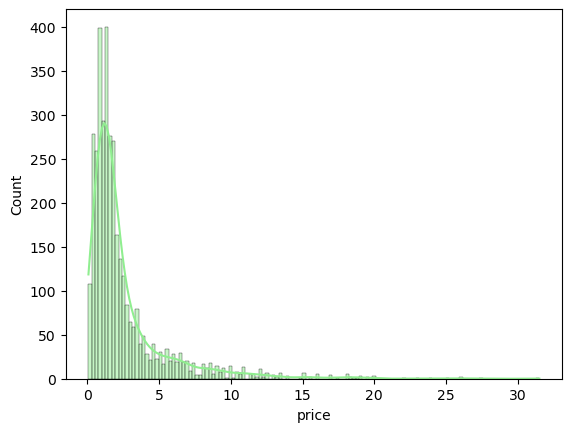

In [12]:
sns.histplot(df.price,kde=True,color='lightgreen')

In [13]:
df.price.describe()

count    3653.000000
mean        2.534873
std         2.981339
min         0.070000
25%         0.950000
50%         1.540000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: >

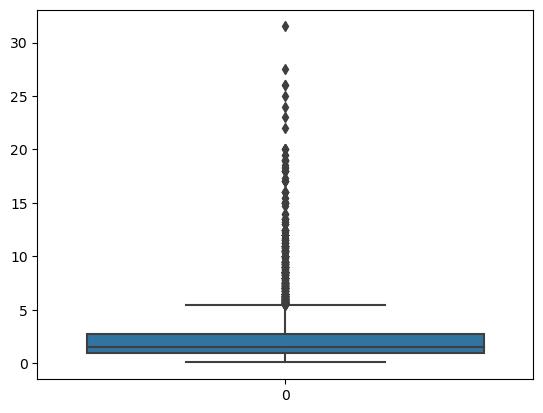

In [14]:
sns.boxplot(df.price)

In [15]:
q1= df.price.quantile(0.25)
q3= df.price.quantile(0.75)

IQR = q3 - q1
lower_bound = q1 - 1.5*IQR ; upper_bound= q3 + 1.5*IQR

outliers =  df[ (df.price < lower_bound ) | (df.price > upper_bound)]
outliers.shape

(424, 23)

In [16]:
# outliers in price column 
outliers.price.describe()

count    424.000000
mean       9.238538
std        4.069617
min        5.460000
25%        6.455000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

In [17]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2196,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
2439,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
1860,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
3200,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2275,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
2288,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
537,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
2704,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
2931,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
3002,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97


In [18]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

## price_per_sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

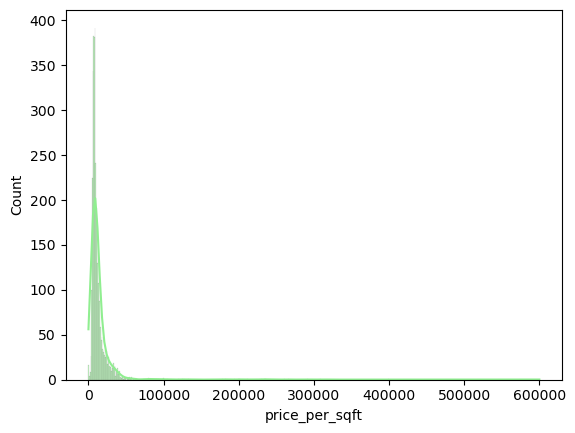

In [19]:
sns.histplot(df.price_per_sqft,kde=True,color='lightgreen')

<Axes: >

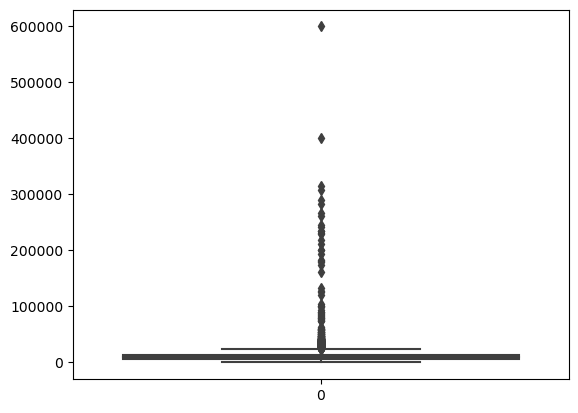

In [20]:
sns.boxplot(df.price_per_sqft)

In [21]:

Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# boundary for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# edentify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# num of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(352,
 count       352.000000
 mean      52679.818182
 std       61305.861220
 min       24500.000000
 25%       28224.750000
 50%       33368.500000
 75%       41882.750000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [22]:
outliers_sqft # observing of excell conclusion these area are very small and are in 'YARDS' need to convert it into ft by * 9

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,0,0
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,3.0,NaN,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,0,20
30,house,unitech uniworld resorts,sector 33,10.00,181818.0,550.0,Plot area 550(51.1 sq.m.),5,6,3,4.0,North-East,New Property,NaN,550.0,NaN,1,1,0,0,0,0,26
31,house,dlf the grove,sector 54,5.70,211111.0,270.0,Built Up area: 270 (25.08 sq.m.),4,4,0,1.0,NaN,Undefined,NaN,270.0,NaN,0,0,0,0,0,0,46
75,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,NaN,1600.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1,1,0,1,1,1,49
3637,house,emaar mgf marbella,sector 66,12.00,37037.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3+,3.0,East,New Property,NaN,3240.0,NaN,0,1,1,1,0,1,106
3638,house,malibu towne,sector 47,8.81,27191.0,3240.0,Plot area 360(301.01 sq.m.),8,6,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,0,1,1,27
3652,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),9,9,3+,3.0,East,Relatively New,NaN,1935.0,NaN,0,0,1,0,0,1,75


In [23]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\ritik\AppData\Local\Temp\ipykernel_20548\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [24]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\ritik\AppData\Local\Temp\ipykernel_20548\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [25]:
outliers_sqft['price_per_sqft'].describe()

count      352.000000
mean     29439.355114
std      12370.314266
min       2723.000000
25%      25602.500000
50%      29880.000000
75%      35602.250000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [26]:
df.update(outliers_sqft)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

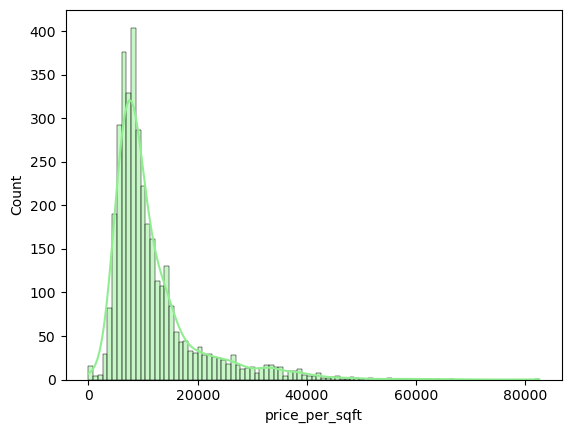

In [27]:
# now again 
sns.histplot(df.price_per_sqft,kde=True,color='lightgreen') # good results since more normalized than previous one 

<Axes: xlabel='price_per_sqft'>

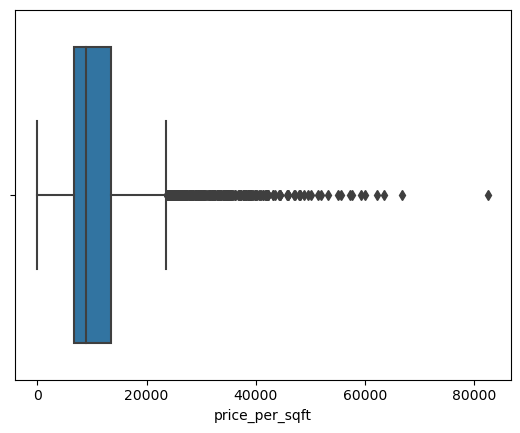

In [28]:
sns.boxplot(x=df['price_per_sqft']) # still bettter than previous one but outliers are present now also

In [29]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
553,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
1532,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160
1555,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,1,153
1647,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,1,103
1663,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
1860,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
1873,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
2138,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
2288,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2521,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137


In [30]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

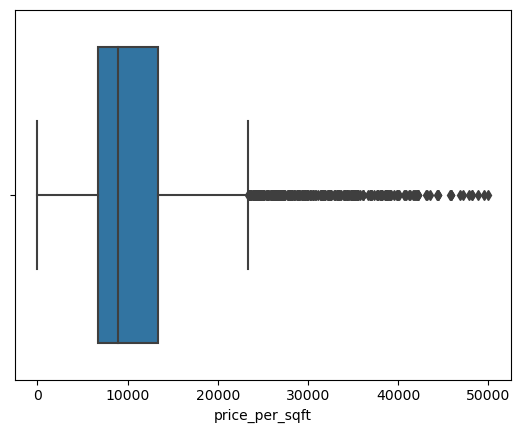

In [31]:
sns.boxplot(x=df['price_per_sqft'])

## area

<Axes: xlabel='area', ylabel='Count'>

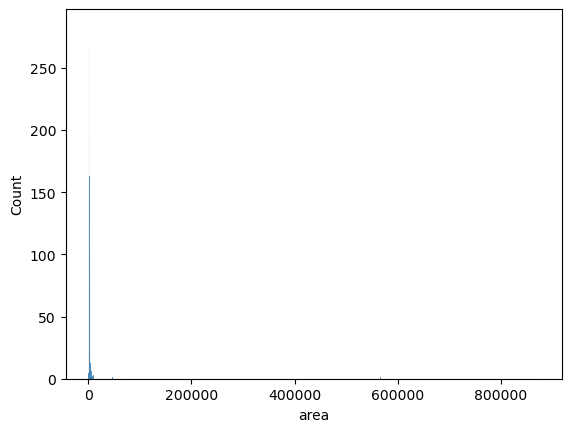

In [32]:
sns.histplot(df.area)

<Axes: >

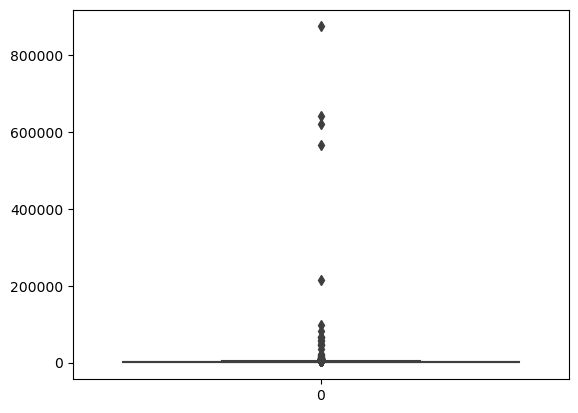

In [33]:
sns.boxplot(df.area)

In [34]:
df = df[df['area'] < 100000]

<Axes: xlabel='area', ylabel='Count'>

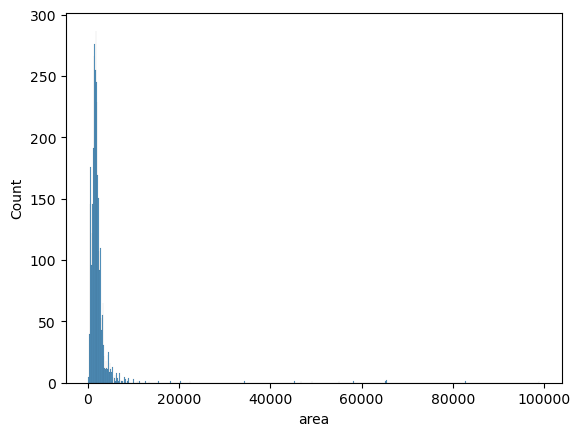

In [35]:
sns.histplot(df.area)

<Axes: >

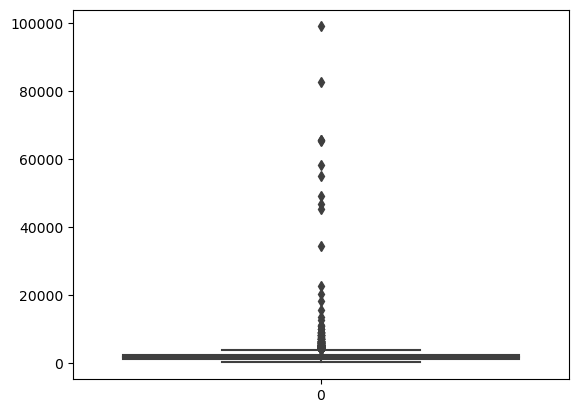

In [36]:
sns.boxplot(df.area)

In [37]:
df[df['area'] > 10000].sort_values('area',ascending=False).index
# stoppppppppppp

Index([2654, 2003, 1389, 2382,  282,   71, 3527, 2745, 2988, 2346, 1592,  801,
       2641,  706, 3124, 1582, 1877, 2439,  506,  382],
      dtype='int64')

In [38]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2654,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
2003,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1389,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
2382,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
282,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
71,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
3527,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
2745,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2988,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2346,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [39]:
df.loc[2003,'area'] = 115*9
df.loc[282,'area'] = 7250
df.loc[2988,'area'] = 5800
df.loc[801,'area'] = 2660
df.loc[2641,'area'] = 2850
df.loc[706,'area'] = 1812
df.loc[3124,'area'] = 2160
df.loc[1877,'area'] = 1175

In [40]:
df.drop(index=[2654, 1389, 2382,   71, 3527, 2745, 2346, 1592,  1582, 2439,  506,  382], inplace=True)

In [41]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


<Axes: xlabel='area', ylabel='Count'>

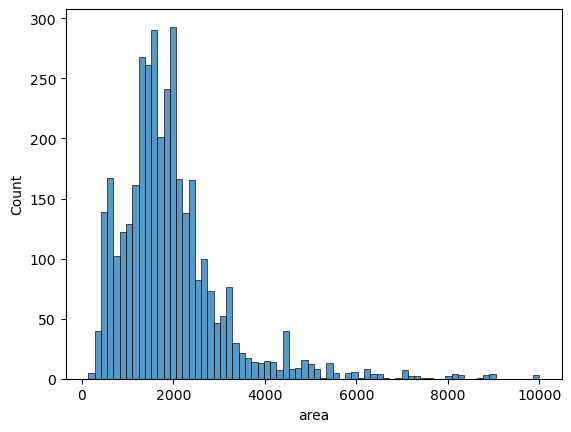

In [42]:
sns.histplot(df.area)

<Axes: >

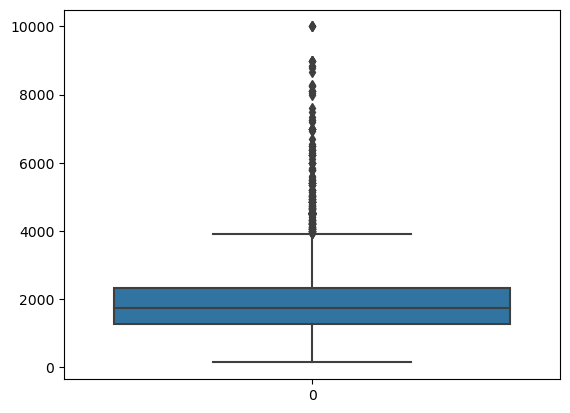

In [43]:
sns.boxplot(df.area)

In [44]:
df['area'].describe()

count     3623.000000
mean      1941.126415
std       1180.703951
min        145.000000
25%       1260.500000
50%       1746.000000
75%       2324.500000
max      10000.000000
Name: area, dtype: float64

## Bedroom

<Axes: xlabel='bedRoom', ylabel='Count'>

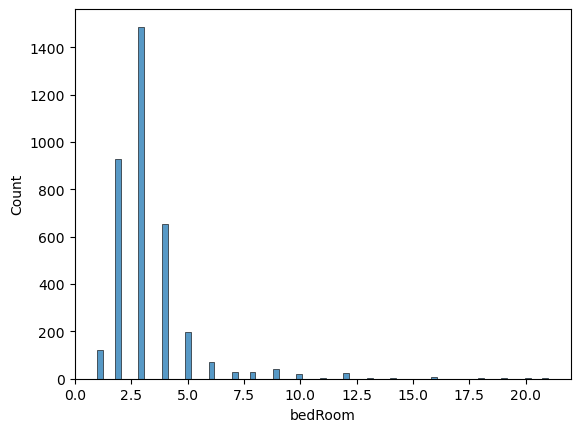

In [45]:
sns.histplot(df.bedRoom)

<Axes: >

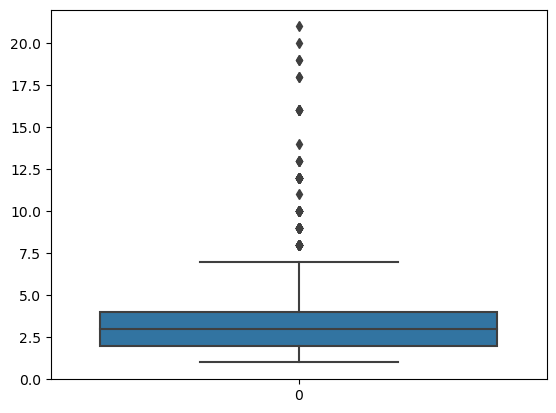

In [46]:
sns.boxplot(df.bedRoom)

In [47]:
df.bedRoom.describe()

count    3623.000000
mean        3.331493
std         1.828427
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [48]:
df[df.bedRoom > 10 ].sort_values('bedRoom', ascending = False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
266,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
1510,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
1609,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
1540,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
2892,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
1490,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
1272,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49
2931,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
1808,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,1,20
510,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,1,0


In [49]:
df = df[df['bedRoom'] <= 10] # it impossible to have 21 bedrooms in 1161 sqft

In [50]:
df.shape

(3578, 23)

<Axes: xlabel='bedRoom', ylabel='Count'>

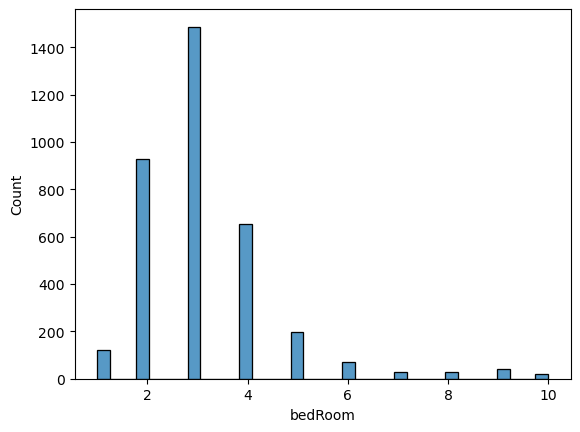

In [51]:
sns.histplot(df.bedRoom)

<Axes: >

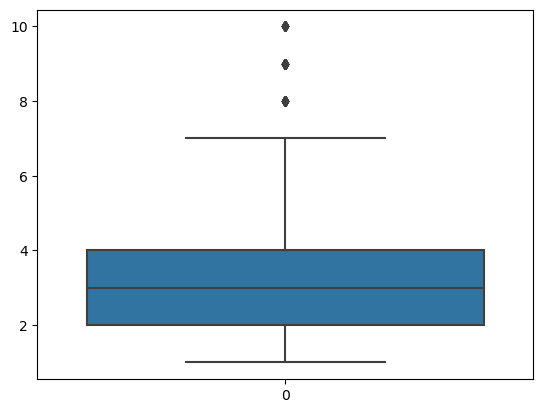

In [52]:
sns.boxplot(df.bedRoom)

In [53]:
df.bedRoom.describe()

count    3578.00000
mean        3.20123
std         1.39020
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max        10.00000
Name: bedRoom, dtype: float64

## bathroom

<Axes: xlabel='bathroom', ylabel='Count'>

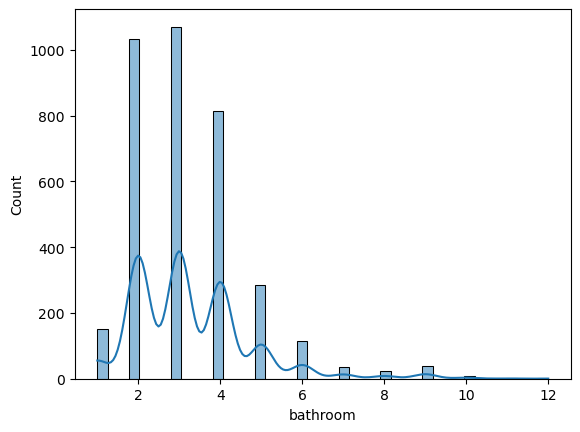

In [54]:
sns.histplot(df.bathroom , kde=True)

<Axes: >

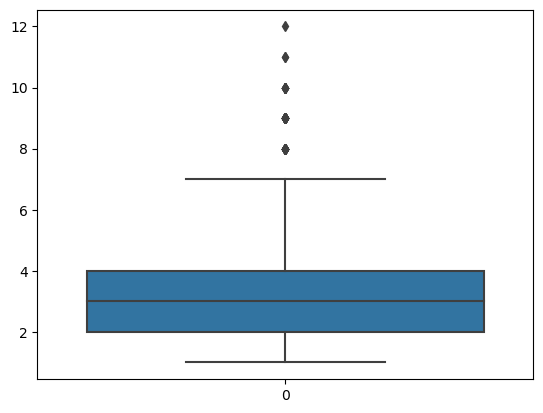

In [55]:
sns.boxplot(df.bathroom)

In [56]:
df[df.bathroom> 10 ].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
438,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
1571,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38
3593,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39


In [57]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 28,4.50,13889.0,3240.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,0,0
1,flat,emaar mgf the palm drive,sector 66,2.80,14358.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,12.0,East,New Property,1950.0,1920.0,1600.0,1,1,0,1,0,2,69
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,16.0,NaN,Under Construction,1689.0,NaN,1082.0,0,0,0,1,0,1,103
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,3.0,NaN,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,0,20
4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,1.0,South,Old Property,NaN,1800.0,NaN,1,0,0,1,0,0,24


## super builtup area

<Axes: xlabel='super_built_up_area', ylabel='Count'>

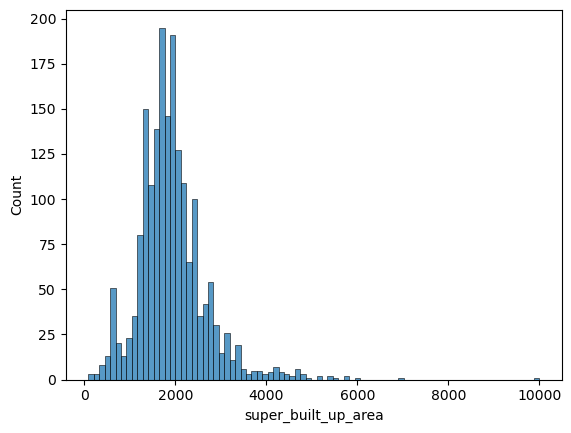

In [58]:
sns.histplot(df.super_built_up_area)

<Axes: >

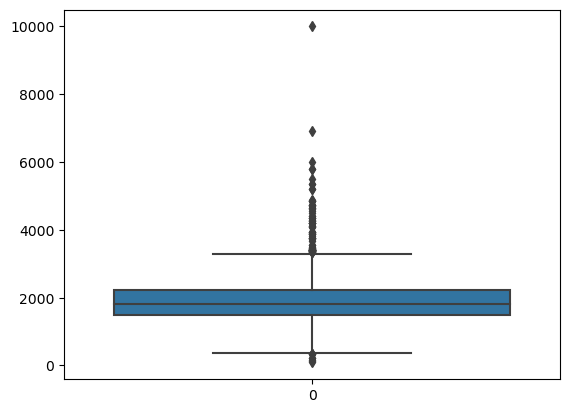

In [59]:
sns.boxplot(df.super_built_up_area)

In [60]:
df.super_built_up_area.describe()

count     1873.000000
mean      1925.504832
std        764.525564
min         89.000000
25%       1479.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

## builtup area

<Axes: xlabel='built_up_area', ylabel='Count'>

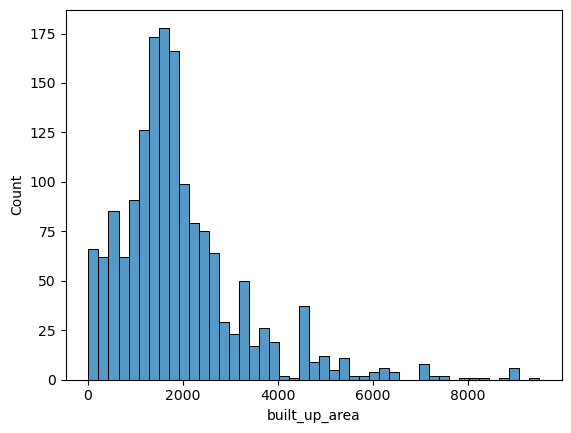

In [61]:
sns.histplot(df.built_up_area)

<Axes: >

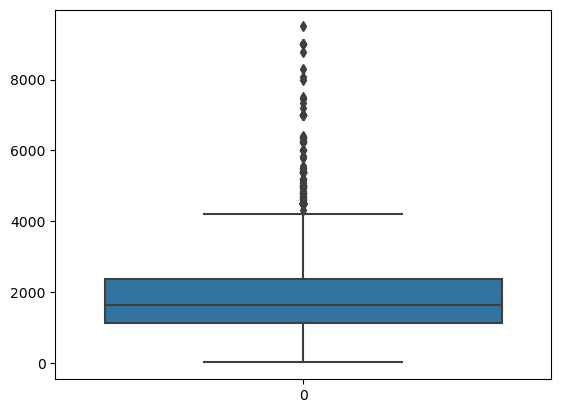

In [62]:
sns.boxplot(df.built_up_area)

In [63]:
df.built_up_area.describe()

count    1608.000000
mean     1932.338948
std      1378.461441
min        14.000000
25%      1120.000000
50%      1650.000000
75%      2371.500000
max      9500.000000
Name: built_up_area, dtype: float64

In [64]:
## carpet area

<Axes: xlabel='carpet_area', ylabel='Count'>

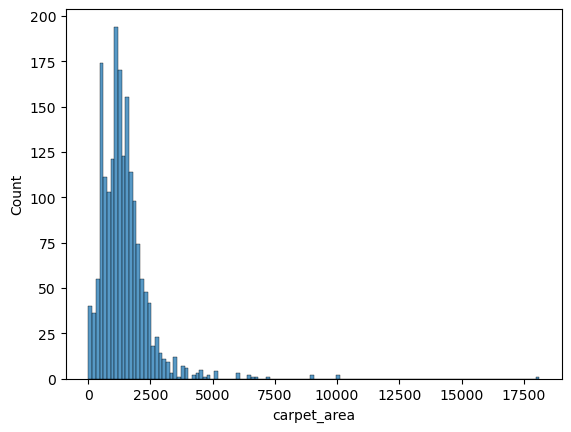

In [65]:
sns.histplot(df.carpet_area)

<Axes: >

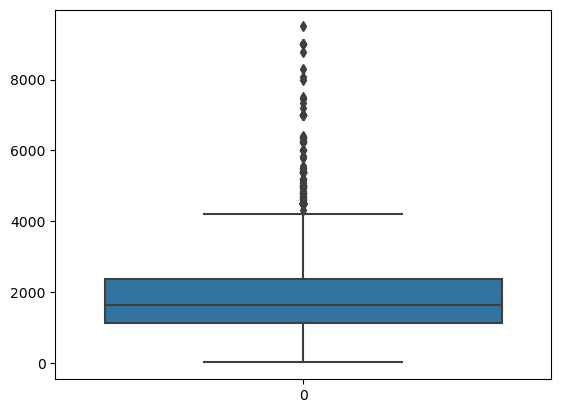

In [66]:
sns.boxplot(df.built_up_area)

In [67]:
df.carpet_area.describe()

count     1847.000000
mean      1423.755212
std        998.874082
min         15.000000
25%        845.000000
50%       1300.000000
75%       1762.000000
max      18122.000000
Name: carpet_area, dtype: float64

In [68]:
df[df.carpet_area <500 ]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
73,house,sector 38 rwa,sector 38,1.40,23932.0,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8,8,3,4.0,East,Moderately Old,NaN,62.0,60.00000,0,0,0,0,1,1,40
82,house,independent,sector 4,1.90,8444.0,2250.0,Plot area 250(209.03 sq.m.)Carpet area: 190 sq...,4,3,2,2.0,North-East,Moderately Old,NaN,NaN,190.00000,0,0,1,1,0,1,46
89,flat,prime habitat,sector 99a,0.27,5432.0,497.0,Carpet area: 497 (46.17 sq.m.),2,2,1,4.0,North-East,New Property,NaN,NaN,497.00000,0,0,0,0,0,0,7
140,flat,gls arawali homes,sohna road,0.28,4938.0,567.0,Super Built up area 567(52.68 sq.m.)Built Up a...,2,2,2,3.0,East,Relatively New,567.0,500.0,467.00000,0,0,0,0,0,1,42
143,house,saksham welfare association,sector 22,4.70,19847.0,2368.0,Plot area 220Built Up area: 170 sq.m.Carpet ar...,6,6,3+,2.0,West,Old Property,NaN,170.0,160.00000,0,0,1,1,0,1,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,house,rk excelo,sector 12,0.60,13333.0,450.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,5,3,2,3.0,North,Moderately Old,NaN,30.0,15.00000,0,0,0,0,1,0,0
3641,house,independent,sector 14,5.50,16975.0,3240.0,Plot area 360(301.01 sq.m.)Built Up area: 355 ...,5,4,2,2.0,East,Old Property,NaN,355.0,300.00000,1,0,0,0,0,0,27
3660,house,independent,sector 3 phase 2,0.40,8000.0,500.0,Built Up area: 500 (46.45 sq.m.)Carpet area: 3...,2,1,0,1.0,South,Undefined,NaN,500.0,300.00000,0,0,0,0,0,0,0
3665,flat,pareena laxmi apartments,sector 99a,0.30,5424.0,553.0,Super Built up area 553(51.38 sq.m.)Carpet are...,2,1,2,5.0,North,New Property,553.0,NaN,470.00000,0,0,0,0,0,0,66


In [69]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 28,4.50,13889.0,3240.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,0,0
1,flat,emaar mgf the palm drive,sector 66,2.80,14358.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,12.0,East,New Property,1950.0,1920.0,1600.0,1,1,0,1,0,2,69
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,16.0,NaN,Under Construction,1689.0,NaN,1082.0,0,0,0,1,0,1,103
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,3.0,NaN,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,0,20
4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,1.0,South,Old Property,NaN,1800.0,NaN,1,0,0,1,0,0,24


<Axes: xlabel='luxury_score', ylabel='Count'>

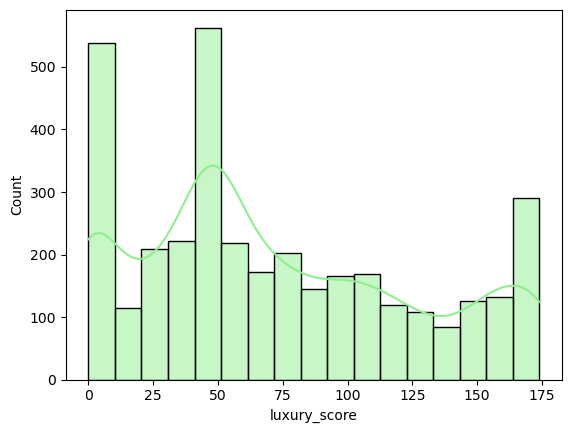

In [70]:
sns.histplot(df.luxury_score,kde=True,color='lightgreen')

<Axes: >

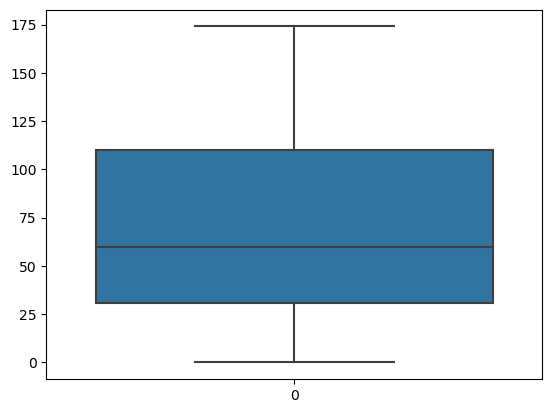

In [71]:
sns.boxplot(df.luxury_score)

In [72]:
df.shape

(3578, 23)

In [73]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [74]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 28,4.50,13889.0,3240.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,0,0
1,flat,emaar mgf the palm drive,sector 66,2.80,14359.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,12.0,East,New Property,1950.0,1920.0,1600.0,1,1,0,1,0,2,69
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,16.0,NaN,Under Construction,1689.0,NaN,1082.0,0,0,0,1,0,1,103
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,3.0,NaN,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,0,20
4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,1.0,South,Old Property,NaN,1800.0,NaN,1,0,0,1,0,0,24


<Axes: xlabel='price_per_sqft', ylabel='Count'>

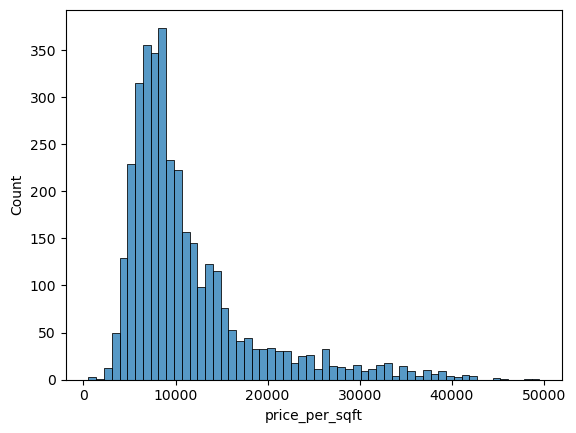

In [75]:
sns.histplot(df['price_per_sqft'])

<Axes: >

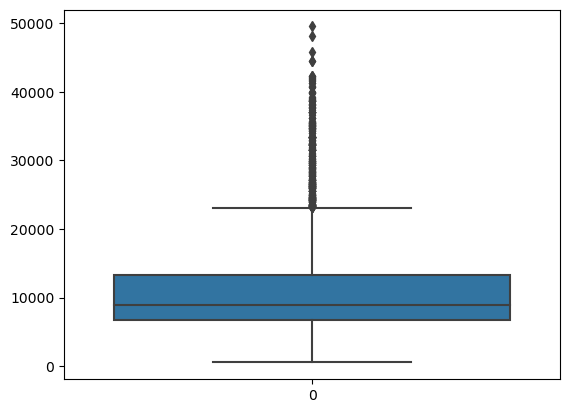

In [76]:
sns.boxplot(df['price_per_sqft'])

In [77]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1052,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
1165,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1677,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
1727,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
2000,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
2053,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0
2717,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
3002,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
3493,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60


In [78]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

251.5

In [79]:
df[(df['area']/df['bedRoom'])<250]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
26,house,independent,sector 12,1.20,14184.0,846.0,Plot area 846(78.6 sq.m.)Built Up area: 846 sq...,4,4,2,2.0,North,Relatively New,NaN,846.0,NaN,0,0,0,1,0,1,7
38,house,independent,sector 28,0.75,20833.0,360.0,Plot area 40(33.45 sq.m.),7,4,3+,4.0,NaN,Moderately Old,NaN,360.0,NaN,0,0,0,0,0,0,7
65,house,independent,sector 7,0.95,21111.0,450.0,Plot area 450(41.81 sq.m.),2,1,1,3.0,NaN,New Property,NaN,450.0,NaN,0,0,0,0,0,0,15
73,house,sector 38 rwa,sector 38,1.40,23932.0,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8,8,3,4.0,East,Moderately Old,NaN,62.0,60.0,0,0,0,0,1,1,40
75,house,independent,sector 12,6.00,35088.0,1710.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,NaN,1600.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,house,housing board colony,sector 28,3.50,25926.0,1350.0,Plot area 150(125.42 sq.m.),6,6,3,3.0,NaN,Relatively New,NaN,1350.0,NaN,0,0,0,0,0,0,0
3608,house,rk excelo,sector 12,0.60,13333.0,450.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,5,3,2,3.0,North,Moderately Old,NaN,30.0,15.0,0,0,0,0,1,0,0
3623,house,sai kripa floors 5,sector 11,0.90,11250.0,800.0,Plot area 800(74.32 sq.m.),5,5,3,3.0,NaN,Relatively New,NaN,800.0,NaN,0,0,0,0,0,0,0
3652,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),9,9,3+,3.0,East,Relatively New,NaN,1935.0,NaN,0,0,1,0,0,1,75


C:\Users\ritik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


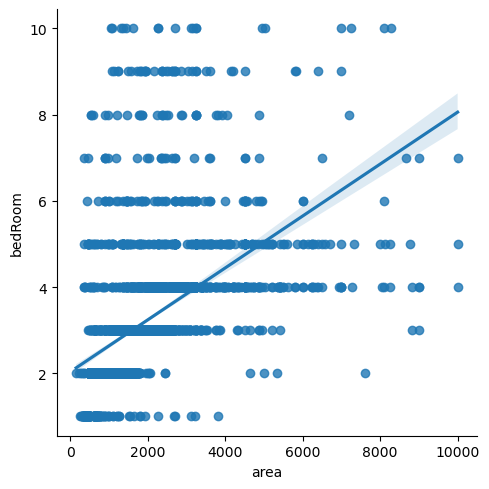

In [80]:
sns.lmplot(data = df , x = 'area',y = 'bedRoom')

In [81]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [82]:
df[ df['area_room_ratio'] < 250 ]['bedRoom'].value_counts()

bedRoom
2     47
3     32
5     28
4     17
6     17
9     15
8     12
7      8
10     8
Name: count, dtype: int64

In [83]:
df = df[ df['area_room_ratio'] > 100 ]

In [84]:
outlier_df = df[ ( df['area_room_ratio'] < 250 ) & (df['bedRoom'] > 3) ]

In [85]:
outlier_df['bedRoom'] = round( outlier_df['bedRoom']/outlier_df['floorNum'] )

C:\Users\ritik\AppData\Local\Temp\ipykernel_20548\3640020962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['bedRoom'] = round( outlier_df['bedRoom']/outlier_df['floorNum'] )


In [86]:
df.update(outlier_df)

In [87]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [88]:
df.shape

(3558, 24)

In [89]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 28,4.50,13889.0,3240.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,0,0,810.0
1,flat,emaar mgf the palm drive,sector 66,2.80,14359.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,12.0,East,New Property,1950.0,1920.0,1600.0,1,1,0,1,0,2,69,650.0
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,16.0,NaN,Under Construction,1689.0,NaN,1082.0,0,0,0,1,0,1,103,563.0
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,3.0,NaN,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,0,20,648.0
4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,1.0,South,Old Property,NaN,1800.0,NaN,1,0,0,1,0,0,24,450.0


In [90]:
 df [(df['area_room_ratio']<250 ) &( df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
451,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
460,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600000
694,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
727,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
895,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
1043,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
1207,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
1761,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0,150.000000
1859,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
2222,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000


In [91]:
 df [(df['area_room_ratio']<250 ) &( df['bedRoom'] > 4)].shape # remove these properties from dataset 

(13, 24)

In [92]:
 df [~(df['area_room_ratio']<250 ) &( df['bedRoom'] > 4)].shape

(297, 24)

In [93]:
 df [ ~( (df['area_room_ratio']<250 ) &( df['bedRoom'] > 4) ) ].shape

(3545, 24)

In [94]:
df =   df [ ~( (df['area_room_ratio']<250 ) &( df['bedRoom'] > 4) ) ]

In [95]:
df.shape

(3545, 24)

C:\Users\ritik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


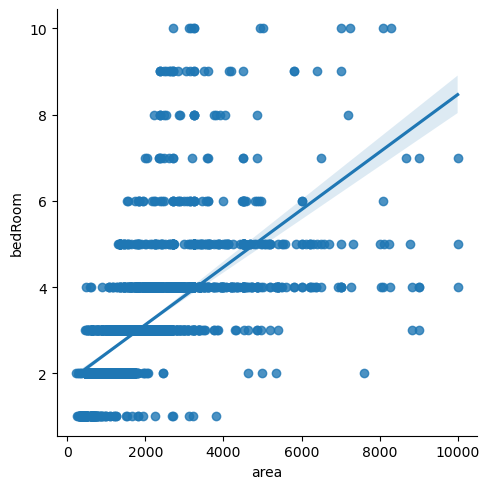

In [96]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [97]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 28,4.50,13889.0,3240.0,Built Up area: 360 (33.45 sq.m.),4,4,0,4.0,NaN,Undefined,NaN,360.0,NaN,0,0,0,0,0,0,0,810.0
1,flat,emaar mgf the palm drive,sector 66,2.80,14359.0,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3,3,2,12.0,East,New Property,1950.0,1920.0,1600.0,1,1,0,1,0,2,69,650.0
2,flat,hero homes,sector 104,1.90,11249.0,1689.0,Super Built up area 1689(156.91 sq.m.)Carpet a...,3,3,3,16.0,NaN,Under Construction,1689.0,NaN,1082.0,0,0,0,1,0,1,103,563.0
3,house,independent,sector 50,10.56,32593.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,3.0,NaN,Moderately Old,NaN,3240.0,NaN,0,1,0,0,0,0,20,648.0
4,house,not applicable,sector 11,2.20,12222.0,1800.0,Plot area 1800(167.23 sq.m.),4,3,2,1.0,South,Old Property,NaN,1800.0,NaN,1,0,0,1,0,0,24,450.0


In [98]:
df.to_csv('gurgaon_properties_outlier_treated.csv',index=False)